In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from scipy.spatial.distance import euclidean
from tqdm.notebook import tqdm

from metric_tree import MetricTree
from search_algorithms import exact_nn_search, defeatist_search,  search_pruning
from search_alg_visited_nodes import defeatist_search_vn, search_pruning_vn
from visualize import visualize_metric_nn

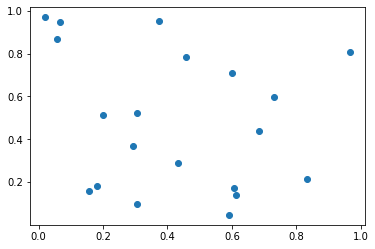

In [2]:
np.random.seed(42)
points = np.random.rand(20, 2)
plt.scatter(points[:,0], points[:,1])

In [3]:
np.random.seed(42)
full_tree = MetricTree(points)
full_tree

MetricTree: root=[0.83244264 0.21233911], size=20

In [4]:
correct = 0
n_try = 100000
pbar = tqdm(range(n_try), desc="Test pruning search")
for i in pbar:
    q = np.random.rand(2)
    true_nn = exact_nn_search(points, q)[0]
    result = search_pruning(full_tree, q)[0]
    correct += 1 if (true_nn == result).all() else 0
    pbar.set_postfix({"Precision": correct/(i+1)}) 

In [5]:
correct/n_try

1.0

In [6]:
correct = 0
n_try = 100000
pbar = tqdm(range(n_try), desc="Test defeatist search")
for i in pbar:
    q = np.random.rand(2)
    true_nn = exact_nn_search(points, q)[0]
    result = defeatist_search(full_tree, q)[0]
    correct += 1 if (true_nn == result).all() else 0
    pbar.set_postfix({"Precision": correct/(i+1)}) 

In [7]:
correct/n_try

0.51554

In [8]:
q = (0.4,0.4)
result = defeatist_search_vn(full_tree, q)
print(result)

(array([0.29214465, 0.36636184]), 0.11297921236311474, 4)


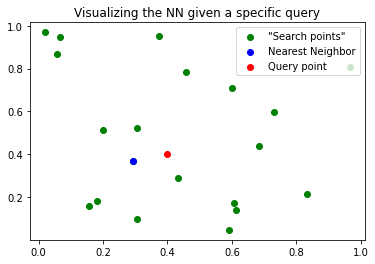

In [10]:
visualize_metric_nn(points, result[0], q)

In [12]:
q = (0,0)
search_pruning_vn(full_tree, q)

(array([0.15601864, 0.15599452]), 0.2206266224652597, 12)